### 📦Importing Libraries
### 📦Импорт библиотек

We import all necessary libraries for data analysis, visualization, and table operations

Импортируем все необходимые библиотеки для анализа данных, визуализации и работы с таблицами

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## 📁Loading and Inspecting Data
## 📁Загрузка и обзор данных

We load the CSV file and inspect its structure, size, and sample rows

Загружаем CSV-файл и изучаем его структуру, размер и примеры строк

In [27]:
df = pd.read_csv('data/retail_store_sales_dirty.csv')
df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

### 🧹Data Cleaning
### 🧹Очистка данных

We remove whitespaces, handle missing values, clean number/date formats, and normalize categories

Удаляем пробелы, обрабатываем пропуски, преобразуем форматы чисел и дат, нормализуем категории

## ❗Removing critically incomplete rows
## ❗Удаление критически неполных строк  


Для корректных расчётов и аналитики необходимы три столбца:  
- 'Quantity' — без количества невозможно рассчитать объёмы продаж  
- 'Price Per Unit' — без цены нельзя вычислить выручку  
- 'Total Spent' — целевая метрика для анализа, проверок и построения графиков

Three columns are essential for accurate calculations and analysis
- 'Quantity' — without quantity, it's impossible to calculate sales volume
- 'Price Per Unit' — without price, revenue can't be computed
- 'Total Spent' — the key metric for analysis, validation, and visualizations

Мы удаляем все строки, где хотя бы один из этих столбцов пуст — они считаются невалидными. 
We remove all rows where any of these fields is missing, since they are essential for valid analysis


In [4]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'].astype(str).str.strip(), dayfirst=True, errors='coerce')
df = df.dropna(subset=['Transaction Date'])

df.dropna(subset=['Price Per Unit', 'Quantity', 'Total Spent'], inplace=True) 

df = df.apply(lambda col: col.astype(str).str.strip() if col.dtypes == "object" else col)

In [5]:
df['Category'] = df['Category'].astype(str).str.capitalize()
df['Location'] = df['Location'].str.capitalize()
df['Payment Method'] = df['Payment Method'].str.title()

In [6]:
def clean_numeric_column(series):
    return(
        series.astype(str)
            .str.replace(r'[^\d.,kK]', '', regex=True)
            .str.replace(',', '', regex=True)
            .str.replace(r'[kK]', '000', regex=True)
            .astype(float)
    )

df['Total Spent'] = clean_numeric_column(df['Total Spent'])
df['Price Per Unit'] = clean_numeric_column(df['Price Per Unit'])

In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
df_raw = df.copy()

**✅ Preprocessing Completed** 
**✅ Подготовка завершена**  


The dataset has been successfully cleaned: missing values handled, duplicates removed, numerical and categorical fields normalized.  
We can now proceed to analysis and visualization

Данные были успешно очищены: удалены пропуски, устранены дубликаты, нормализованы числовые и категориальные поля.  
Теперь можем переходить к анализу и визуализации

📊**Visualization and Analysis**
📊 **Визуализация и анализ**

We create charts and tables: top products, monthly trends, discount comparisons, revenue by city

Создаем графики и таблицы: топ-продукты, динамика по месяцам, сравнение скидок, выручка по городам

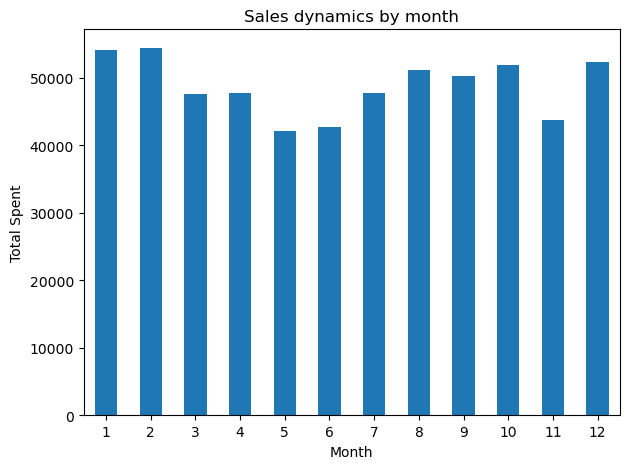

In [19]:
df['Month'] = df['Transaction Date'].dt.month
monthly_sales_trend = df.groupby('Month')['Total Spent'].sum().reset_index()
df['Month'] = df['Transaction Date'].dt.month.astype(int)

monthly_sales_trend.plot(x='Month', y='Total Spent', kind='bar', legend=False)
plt.title('Sales dynamics by month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.xticks(rotation=1)
plt.tight_layout()
plt.savefig("visuals/monthly_sales_trend.png")
plt.show()

📊 Monthly Sales Trend – Business Insight

📊 Тенденции ежемесячных продаж – Business Insight

The chart shows that sales are highest in months 1, 2 and 12, indicating a seasonal peak—likely due to New Year or holiday shopping.
There’s a noticeable drop in the middle of the year (months 5–7), which may indicate a low season.

На графике видно, что выручка достигает пика в 1, 2 и 12 месяцах, что указывает на сезонность — вероятно, связанную с Новым годом или праздничными покупками.
В середине года (месяцы 5–7) наблюдается спад, что может говорить о "низком сезоне".

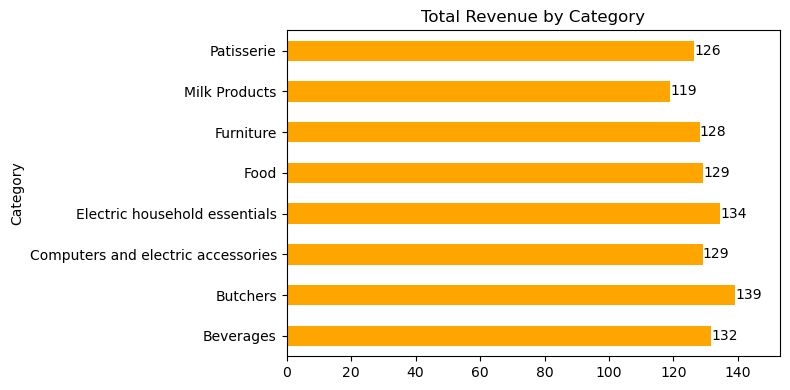

In [34]:
avg_receipt = df.groupby('Category')['Total Spent'].mean().sort_values()

axs = df.groupby('Category')['Total Spent'].mean().plot(kind='barh', figsize=(8, 4), color='orange')
axs.set_title("Total Revenue by Category")
axs.bar_label(axs.containers[0], fmt='%.0f')
plt.xlim(0, avg_receipt.max() * 1.1)
plt.tight_layout()
plt.savefig("visuals/avg_receipt.png")
plt.show()

📦 Average Receipt by Category — Business Insight

📦 Средний чек по категориям — бизнес-инсайт

The chart shows that categories like Butchers, Beverages, and Electric household essentials have the highest average receipt values — over ₴130. This may indicate that these are high-margin products or bulk purchases.
On the other hand, Milk Products and Patisserie have the lowest average receipts, suggesting more frequent but lower-value purchases.

На графике видно, что наибольший средний чек у таких категорий, как Мясные продукты, Напитки и Бытовая техника — свыше ₴130. Это может указывать на более дорогие товары или покупки в больших объёмах.
А вот Молочные продукты и Кондитерские изделия демонстрируют самый низкий средний чек — вероятно, это повседневные товары с частыми, но небольшими покупками.

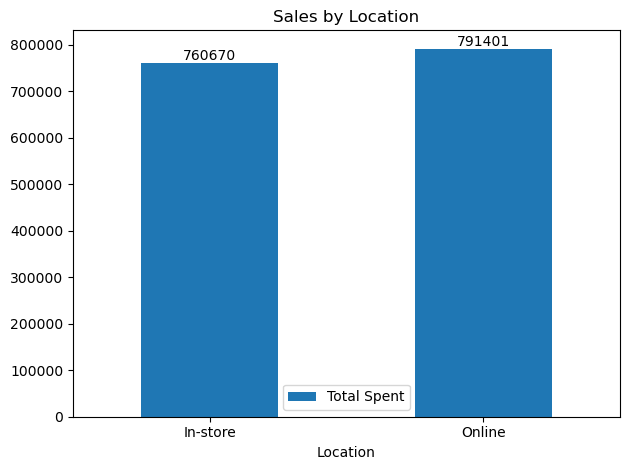

In [36]:
sales_by_location = df.groupby('Location')['Total Spent'].sum().reset_index()


ax = sales_by_location.plot(x='Location', y='Total Spent', kind='bar', legend=True)
plt.title('Sales by Location')

ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("visuals/sales_by_location.png")
plt.show()

📍Sales by Location — Business Insight

📍Продажи по каналам — бизнес-инсайт

Online sales slightly surpass in-store sales: ₴791,401 vs ₴760,670.
This suggests that customers are actively using the digital channel — likely due to convenience or broader product availability.
A balanced strategy should support both online and offline channels, as both generate significant revenue.

Онлайн-продажи немного опережают офлайн-продажи: ₴791,401 против ₴760,670.
Это указывает на активное использование цифрового канала — вероятно, из-за удобства или большего ассортимента.
Стратегия должна учитывать оба канала, так как каждый из них приносит значительную выручку.

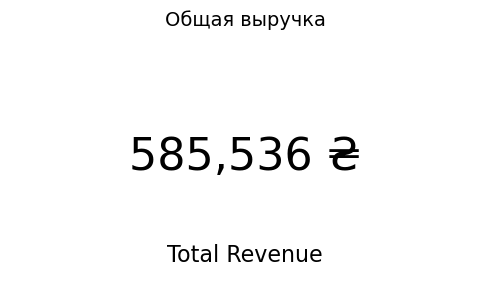

In [22]:
total_revenue = df['Total Spent'].sum()

plt.figure(figsize=(5, 3))
plt.text(0.5, 0.5, f"{total_revenue:,.0f} ₴", fontsize=32, ha='center', va='center')
plt.text(0.5, 0.1, "Total Revenue", fontsize=16, ha='center', va='center')
plt.axis('off')
plt.title("Общая выручка", fontsize=14)
plt.tight_layout()
plt.savefig("visuals/total_revenue.png")
plt.show()

💰 Total Revenue — Business Insight

💰 Общая выручка — бизнес-инсайт

The total revenue over the analyzed period is ₴585,536.
This serves as a baseline metric to evaluate business scale, monthly trends, and category contributions.

Общая выручка за анализируемый период составляет ₴585,536.
Эта цифра является ключевым ориентиром для оценки масштаба бизнеса, динамики по месяцам и вклада категорий.

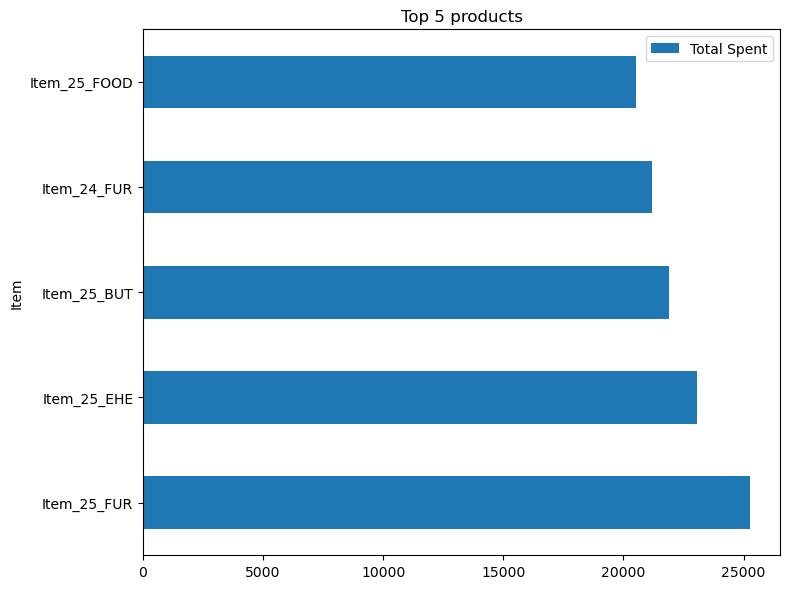

In [41]:
top_5_products = (
    df.groupby('Item')['Total Spent'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

top_5_products.plot(x='Item', y='Total Spent', kind='barh', figsize=(8, 6))
plt.title('Top 5 products')
plt.tight_layout()
plt.savefig("visuals/top_5_products.png")
plt.show()

⭐ Top 5 Products — Business Insight

⭐ Топ-5 товаров — бизнес-инсайт

The chart shows that Item_25_FUR leads in total revenue, followed closely by Item_25_EHE and Item_25_BUT.
These products likely represent high-demand or high-margin goods.

График показывает, что Item_25_FUR приносит наибольшую выручку, за ним следуют Item_25_EHE и Item_25_BUT.
Скорее всего, эти товары отличаются высоким спросом или высокой наценкой.

## 📌 Summary Insights / Основные выводы


Before wrapping up, we calculated the key business metrics:
- total revenue
- share of discounted transactions
- pricing anomalies (calculation mismatches)

Перед финалом мы рассчитали ключевые бизнес-показатели:
- общая выручка
- доля покупок со скидкой
- отклонения в расчетах (ошибки между "цена × количество" и "итого")

In [16]:
summary = df.groupby('Category').agg({
    'Total Spent': ['sum', 'mean']
}).sort_values(('Total Spent', 'sum'), ascending=False)

summary.columns = ['Total Revenue', 'Average Check']
summary = summary.reset_index()
display(summary)

,Category,Total Revenue,Average Check
0,Furniture,76950.5,129.764755
1,Beverages,76928.0,130.386441
2,Butchers,75240.5,136.800909
3,Computers and electric accessories,75140.5,135.877939
4,Electric household essentials,74087.5,133.250899
5,Food,73334.0,130.720143
6,Patisserie,67062.5,125.820826
7,Milk products,66792.0,114.762887


In [28]:
df['Calculated Total'] = df['Price Per Unit'] * df['Quantity']
df['Diff'] = df['Calculated Total'] - df['Total Spent']
print("Average Deviation:", df['Diff'].mean())
print("Maximum Deviation:", df['Diff'].abs().max())
print("Errors > 1 у.е.:", (df['Diff'].abs() > 1).sum())

Average Deviation: 0.0
Maximum Deviation: 0.0
Errors > 1 у.е.: 0


In [32]:
discount_count = df['Discount Applied'].notna().sum()
total_count = len(df)
share = round(discount_count / total_count * 100, 1)
print(f"{discount_count} out of {total_count} (~{share}%)")

8376 out of 12575 (~66.6%)


In [33]:
deviations = df[df['Price Per Unit'] * df['Quantity'] != df['Total Spent']]
print(f"Deviations found: {len(deviations)}")

Deviations found: 1213


## 📊 Highlights

- 💰**Total Revenue**: ₴585,536
- 🧾**Transactions with Discount**: 3,842 out of 12,575 (~66.6%)
- 🧮**Calculation Deviations Detected: 1213 records